# K means cluetering

## in this the value of k is found by elbow method

In [ ]:
# from warnings import filterwarnings
# filterwarnings("ignore")

# Step 1 = Data ingestion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /datasets/03_income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Step 2 = Data quality check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Income($),0


In [ ]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'income')

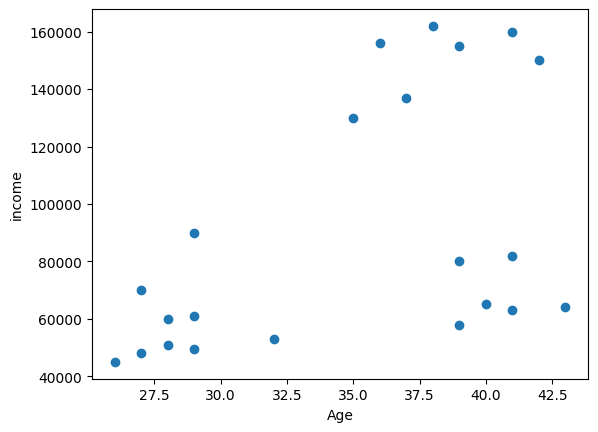

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Age")
plt.ylabel("income")

## Step 3 - Actual Start - Choosing the value of K - Shoulder method

In [ ]:
krange = range(1,10) #calc from 0 to 9 of dataset
sse = []  # the elbow cluster count method uses sse error ....sum of squares

for i in krange:
  km = KMeans(n_clusters=i)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

#  it tells you how tight your clusters are.
# In simple terms:
#  Inertia = How far the data points are from their cluster centers



In [ ]:
sse

[39748148458.54546,
 3318233941.1619043,
 1606229737.6785712,
 843929723.0500001,
 296500418.0952381,
 242500337.42857146,
 177967003.7952381,
 188533698.13333336,
 99466933.61666666]

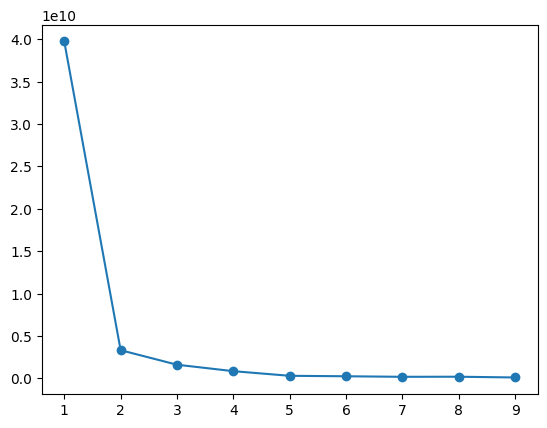

In [ ]:
#Plot the Elbow shape
plt.plot(krange,sse , marker = 'o')

from graph..take either 2 or 3

## Model 1


In [ ]:
model = KMeans(n_clusters=3)

model.fit(df[['Age','Income($)']])


KMeans(n_clusters=3)

In [ ]:
ypred = model.predict(df[['Age','Income($)']])
ypred
# we got 3 clusters

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [ ]:
df['cluster'] = ypred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [ ]:
model.cluster_centers_ #This gives you the coordinates (center points) of each cluster — i.e., the centroids.

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [ ]:
#Store accordint to clusters
df1 = df[df['cluster']==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [ ]:
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


## Shape

In [ ]:
df1.shape

(7, 4)

In [ ]:
df2.shape

(11, 4)

In [ ]:
df3.shape

(4, 4)

In [ ]:
df.shape

(22, 4)

## Plot


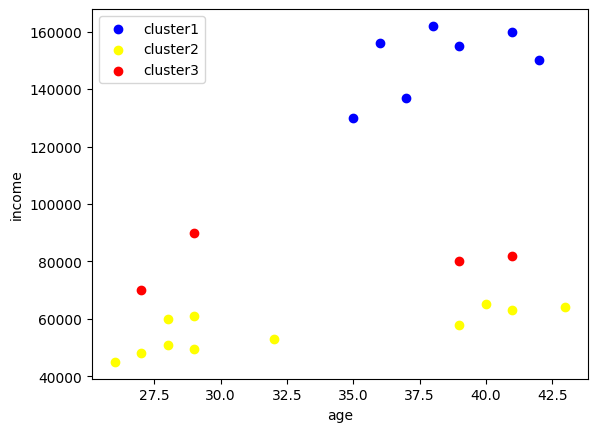

In [ ]:
plt.scatter(df1.Age,df1['Income($)'],color="blue" , label = "cluster1")
plt.scatter(df2.Age,df2['Income($)'],color="yellow" ,label = "cluster2")
plt.scatter(df3.Age,df3['Income($)'],color="red", label = "cluster3")

plt.xlabel("age")
plt.ylabel("income")
plt.legend()


we see some missclassified bcoz we hadnt scaled data neatly..so scale it

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale Age
df['Age'] = scaler.fit_transform(df[['Age']]) #silly mistake here [] -> [[]]

# Scale Income
df['Income($)'] = scaler.fit_transform(df[['Income($)']])


df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
df.drop('cluster',axis=1) #drops for this step only


,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [ ]:
df.drop('cluster',axis=1, inplace=True)
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


## Model


In [ ]:
model1 = KMeans(n_clusters=3)

model1.fit(df[['Age','Income($)']])


KMeans(n_clusters=3)

In [ ]:
ypred1 = model1.predict(df[['Age','Income($)']])
ypred1

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = ypred1
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
#add centroids
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [ ]:
df1.shape

(7, 4)

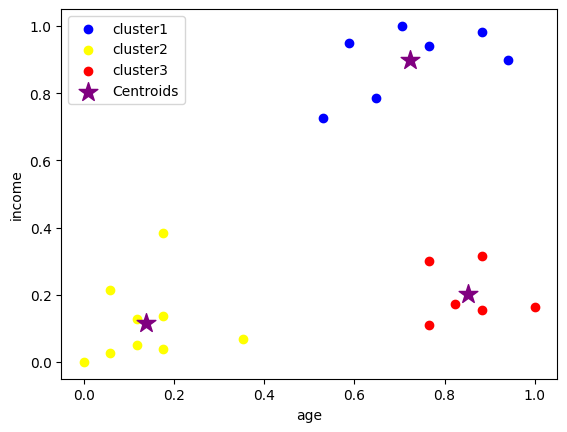

In [ ]:
centroids = model1.cluster_centers_

plt.scatter(df1.Age,df1['Income($)'],color="blue" , label = "cluster1")
plt.scatter(df2.Age,df2['Income($)'],color="yellow" ,label = "cluster2")
plt.scatter(df3.Age,df3['Income($)'],color="red", label = "cluster3")

# Plot the centroids
plt.scatter(centroids[:,0], centroids[:,1], color='purple', marker='*', label='Centroids', s=200)

plt.xlabel("age")
plt.ylabel("income")
plt.legend()
plt.show()


## On IRIS

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler2 = StandardScaler()
scaled_iris_data=scaler2.fit_transform(df_iris)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_iris_data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_iris['Cluster'] = kmeans.labels_


In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [ ]:
df_iris['Cluster'].unique()

array([1, 2, 0], dtype=int32)

In [ ]:
df12  = df_iris[df_iris.Cluster == 0]
df13  = df_iris[df_iris.Cluster == 1]
df14  = df_iris[df_iris.Cluster == 3]

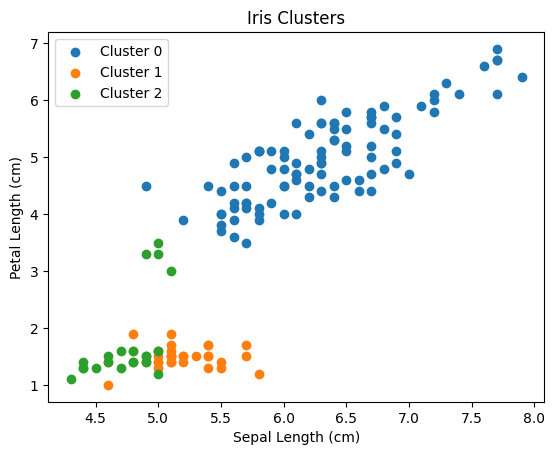

In [ ]:
# prompt: plot the above iris clusters

import matplotlib.pyplot as plt

plt.scatter(df12['sepal length (cm)'], df12['petal length (cm)'], label='Cluster 0')
plt.scatter(df13['sepal length (cm)'], df13['petal length (cm)'], label='Cluster 1')
# Assuming df14 is corrected to df_iris where Cluster == 2
df14  = df_iris[df_iris.Cluster == 2]
plt.scatter(df14['sepal length (cm)'], df14['petal length (cm)'], label='Cluster 2')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Clusters')
plt.legend()
plt.show()
